<a href="https://colab.research.google.com/github/PepiMartin28/ETL-Project/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In this notebbok we are going to viasulize some data from the database thtat we load in the "Load" notebook

In [1]:
# !pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 548.5 kB/s eta 0:00:00


In [10]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
connection = pymysql.connect(
    host='us-cdbr-east-06.cleardb.net',
    user='b59176a577f953',
    password='1ecab0e5',
    database='heroku_0112fbf8f733ea4',
    charset='utf8mb4',
    cursorclass=pymysql.cursors.DictCursor
  )

cursor = connection.cursor()

In [7]:
query = '''
SELECT *
FROM team_stats
WHERE season = '2000-2001' and league_name = 'Premier League'
'''

In [15]:
 df = pd.read_sql_query(query, connection)

<ipython-input-15-792e37608acb>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [25]:
df.head()

,league_id,league_name,season,id,name,matches_played,wins,draws,losses,season_points,...,shots_on_target,shots_on_target_per_90,goals_against,goals_against_per_90,shots_against,shots_against_per_90,goal_diff,clean_sheets,yellow_cards,red_cards
0,9,Premier League,2000-2001,0,Manchester Utd,38,24,8,6,80,...,251,6.6,31,0.8,140,3.7,48,17,44,3
1,9,Premier League,2000-2001,1,Arsenal,38,20,10,8,70,...,267,7.0,38,1.0,133,3.5,25,17,48,3
2,9,Premier League,2000-2001,2,Liverpool,38,20,9,9,69,...,228,6.0,39,1.0,165,4.3,32,14,53,4
3,9,Premier League,2000-2001,3,Leeds United,38,20,8,10,68,...,229,6.0,43,1.1,162,4.3,21,11,72,3
4,9,Premier League,2000-2001,4,Ipswich Town,38,20,6,12,66,...,205,5.4,42,1.1,157,4.1,15,13,32,2


This graph will show the five teams with more points

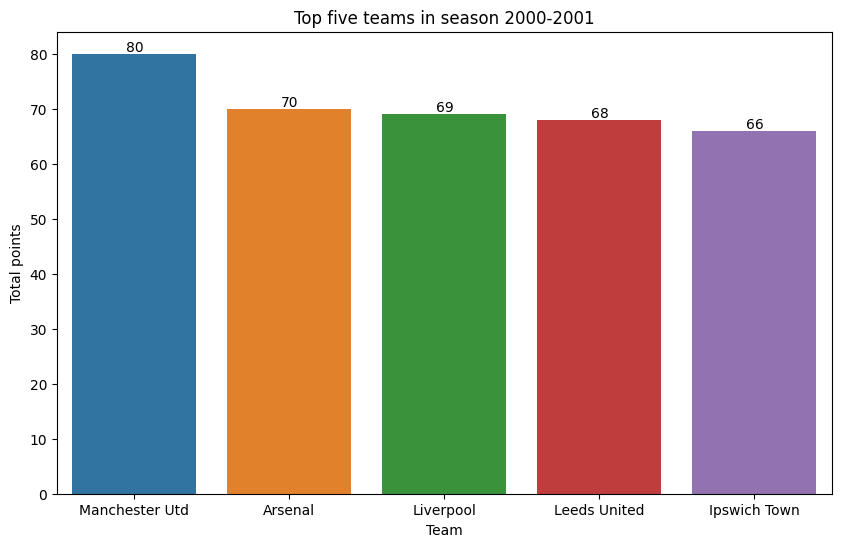

In [33]:
df_sorted = df.sort_values(by='season_points', ascending=False)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='name', y='season_points', data=df_sorted.head())

for i in range(len(df_sorted.head())):
    ax.text(i, df_sorted['season_points'].iloc[i]+0.5, str(df_sorted['season_points'].iloc[i]), ha='center', fontsize=10)

ax.set_title('Top five teams in season 2000-2001')
ax.set_xlabel('Team')
ax.set_ylabel('Total points')

plt.show()

This graph will show the realtion between scored goals and shots on target per 90 min

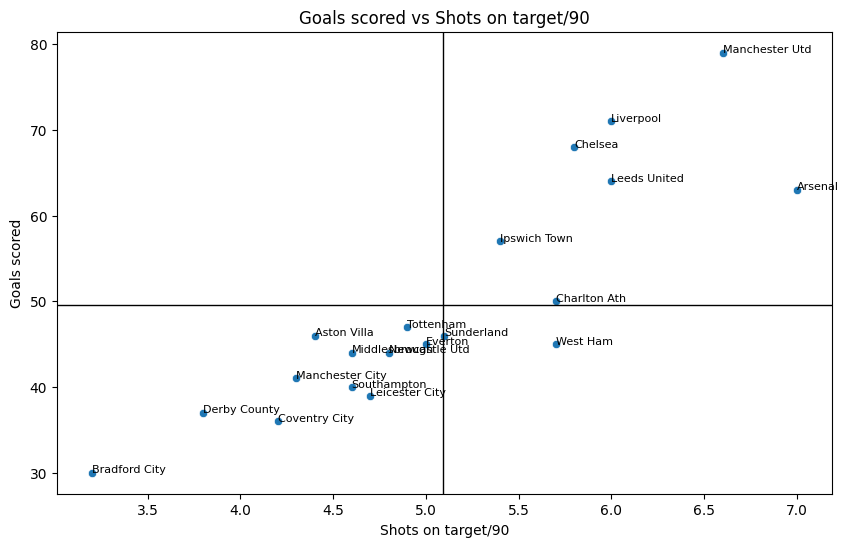

In [36]:
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(x='shots_on_target_per_90', y='goals_scored', data = df)

for i in range(len(df)):
    ax.text(df['shots_on_target_per_90'][i], df['goals_scored'][i], df['name'][i], fontsize=8)

ax.set_title('Goals scored vs Shots on target/90')
ax.set_xlabel('Shots on target/90')
ax.set_ylabel('Goals scored')
ax.axvline(x=df['shots_on_target_per_90'].mean(), color='black', linestyle='-', linewidth=1)
ax.axhline(y=df['goals_scored'].mean(), color='black', linestyle='-', linewidth=1)
plt.show()

The next graph will show the the teams with less seasons in first division

In [44]:
query = '''
SELECT name, COUNT(*) AS total_seasons
FROM team_stats
WHERE league_name='Premier League'
GROUP BY name
ORDER BY total_seasons ASC
'''

In [45]:
df = pd.read_sql_query(query, connection)

<ipython-input-45-792e37608acb>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [46]:
df.head()

,name,total_seasons
0,Bradford City,1
1,Blackpool,1
2,Nott'ham Forest,1
3,Coventry City,1
4,Cardiff City,2


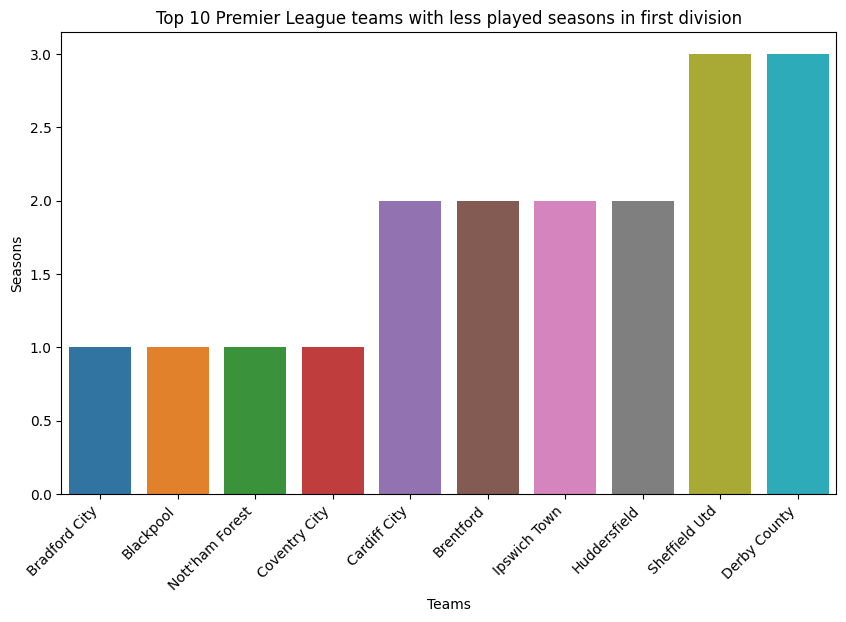

In [49]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x='name', y='total_seasons', data=df.head(10))

ax.set_title('Top 10 Premier League teams with less played seasons in first division')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel('Teams')
ax.set_ylabel('Seasons')

plt.show()